<a href="https://colab.research.google.com/github/Miugleofo100/estrategia.produccion/blob/main-2/TipologiaProblemasPL_Ejemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6 color="#0098CD">
Tipología de los problemas de programación lineal
</font>

---

##Ejemplo 3. **No factible** (Tema 3, página 20).
---

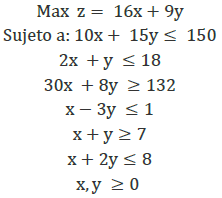

---
###Solución con el método gráfico
---

In [ ]:
# Importa las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

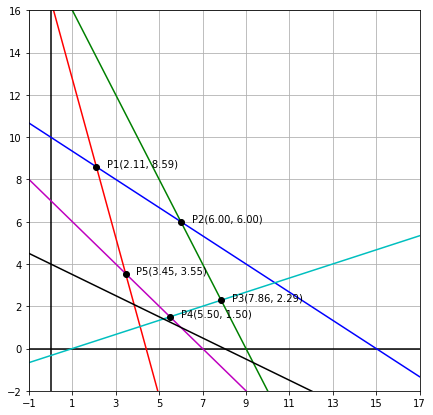

In [ ]:
# Configura los ejes
x_min = -1
x_max = 17
y_min = -2
y_max = 16
div_x = int((x_max - x_min)/2 + 1)
div_y = int((y_max - y_min)/2 + 1)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid()

ax.set_xticks(np.linspace(x_min, x_max, div_x))
ax.set_yticks(np.linspace(y_min, y_max, div_y))

plt.hlines(y=0, xmin=x_min, xmax=x_max, colors="k")
plt.vlines(x=0, ymin=y_min, ymax=y_max, colors="k")

# Valores para la variable de decición x
x = np.linspace(x_min, x_max, 100)

# Gráfica de las restricciones
y1 = (150 - 10*x)/15
ax.plot(x, y1, color="b")

y2 = 18 - 2*x
ax.plot(x, y2, color="g")

y3 = (132 - 30*x)/8
ax.plot(x, y3, color="r")

y4 = (1 - x)/-3
ax.plot(x, y4, color="c")

y5 = 7 - x
ax.plot(x, y5, color="m")

y6 = (8 - x)/2
ax.plot(x, y6, color="k")

# Vértices
A1 = np.array([[30., 8], [10, 15]])
b1 = np.array([132, 150])
[x1, y1] = np.linalg.solve(A1, b1)
ax.plot(x1, y1, "o", color="k")
ax.text(x1 + 0.5, y1, "P1({:.2f}, {:.2f})".format(x1, y1))

A2 = np.array([[10, 15.], [2, 1]])
b2 = np.array([150, 18])
[x2, y2] = np.linalg.solve(A2, b2)
ax.plot(x2, y2, "o", color="k")
ax.text(x2 + 0.5, y2, "P2({:.2f}, {:.2f})".format(x2, y2))

A3 = np.array([[2, 1.], [1, -3]])
b3 = np.array([18, 1])
[x3, y3] = np.linalg.solve(A3, b3)
ax.plot(x3, y3, "o", color="k")
ax.text(x3 + 0.5, y3, "P3({:.2f}, {:.2f})".format(x3, y3))

A4 = np.array([[1, -3.], [1, 1]])
b4 = np.array([1, 7])
[x4, y4] = np.linalg.solve(A4, b4)
ax.plot(x4, y4, "o", color="k")
ax.text(x4 + 0.5, y4, "P4({:.2f}, {:.2f})".format(x4, y4))

A5 = np.array([[30, 8.], [1, 1]])
b5 = np.array([132, 7])
[x5, y5] = np.linalg.solve(A5, b5)
ax.plot(x5, y5, "o", color="k")
ax.text(x5 + 0.5, y5, "P5({:.2f}, {:.2f})".format(x5, y5))

# Solución
#z = 8*x3 + 3*y3
#print("z=", z)
#y_z = (z - 8*x)/3
#ax.plot(x, y_z, color="y")

plt.show()

---
###Solución con [Pyomo](http://www.pyomo.org/)
---

In [ ]:
%%capture
!pip install -q pyomo
!apt-get install -y -qq coinor-cbc

In [ ]:
from pyomo.environ import *

# Crear un modelo
model = ConcreteModel()

# Declarar las variables de decisión
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Definir la función objetivo
model.profit = Objective(expr = 16*model.x + 9*model.y, sense=maximize)

# Definir las restricciones
model.r1 = Constraint(expr = 10*model.x + 15*model.y <= 150)
model.r2 = Constraint(expr = 2*model.x + model.y <= 18)
model.r3 = Constraint(expr = 30*model.x + 8*model.y >= 132)
model.r4 = Constraint(expr = model.x - 3*model.y <= 1)
model.r5 = Constraint(expr = model.x + model.y >= 7)
model.r6 = Constraint(expr = model.x + 2*model.y <= 8)

# Verificar el modelo
model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 16*x + 9*y

6 Constraint Declarations
    r1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 10*x + 15*y : 150.0 :   True
    r2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  18.0 :   True
    r3 : Size=1, Index=None, Active=True
        Key  : Lower : Body       : Upper : Active
        None : 132.0 : 30*x + 8*y :  +Inf :   True
    r4 : Size=1, Index=None, Active=True
   

In [ ]:
# Resolver el modelo
%%capture
SolverFactory('cbc').solve(model, tee=True).write()

  - termination condition: infeasible
  - message from solver: <undefined>


In [ ]:
# Mostrar la solución
print("---------------------------------------------")
print("Solución")
print("---------------------------------------------")

print('\nFunción objetivo:')
print('Z = ', model.profit())

print('\nVariables de decisión:')
print('x = ', model.x.value)
print('y = ', model.y.value)

print("---------------------------------------------")

ERROR:pyomo.core:evaluating object as numeric value: x
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object x


---------------------------------------------
Solución
---------------------------------------------

Función objetivo:


ValueError: ignored